In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import style
import re

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Load the data
test = pd.read_table('/content/gdrive/MyDrive/drugsComTest_raw.tsv')
train = pd.read_table('/content/gdrive/MyDrive/drugsComTrain_raw.tsv')

In [6]:
#check the head of train data
train.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1


In [7]:
#check the head of test data
test.head(10)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4.0,"July 3, 2014",13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"June 6, 2016",1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9.0,"April 21, 2009",32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7.0,"October 18, 2016",21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3


In [8]:
#check the shape of the given dataset
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} number of columns')
print(f'test has {test.shape[0]} number of rows and {test.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
test has 53766 number of rows and 7 number of columns


In [9]:
#check the columns in train
train.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [40]:
#merge train and test data

merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape   #check the shape of merged_data

(215063, 7)

In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.5+ MB


In [15]:
#check number of unique values in drugName
print(merged_data['drugName'].nunique())

#check number of unique values in condition
print(merged_data['condition'].nunique())

3671
916


In [16]:
#set the condition to lower case 
merged_data['condition'] =  merged_data['condition'].str.lower()

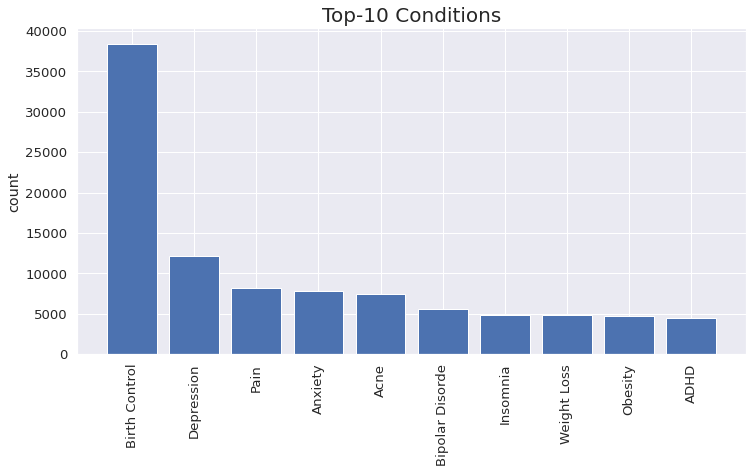

In [42]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(10)

plt.bar(conditions.index,conditions.values)
plt.title('Top-10 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

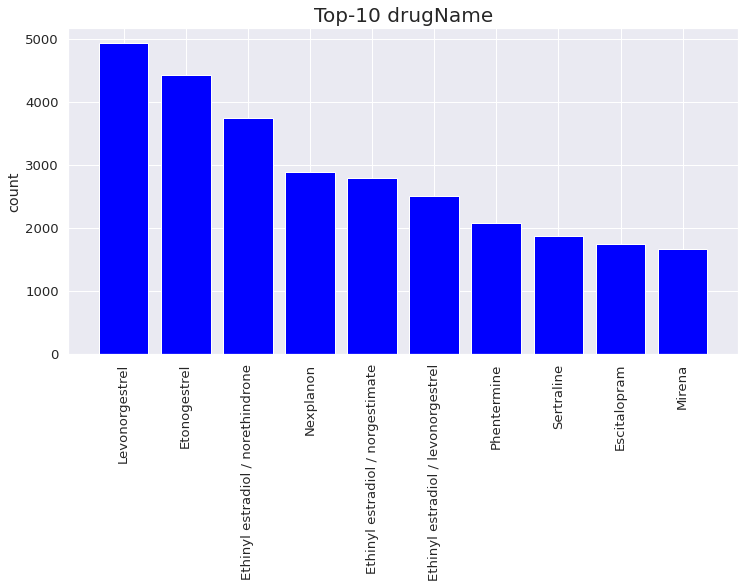

In [43]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_top = merged_data['drugName'].value_counts(ascending = False).head(10)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('Top-10 drugName',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [21]:
ratings_ = merged_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/merged_data.shape[0])
print(ratings_)

   rating  counts    percent
0    10.0   68005  31.620967
1     9.0   36708  17.068487
2     1.0   28918  13.446292
3     8.0   25046  11.645890
4     7.0   12547   5.834104
5     5.0   10723   4.985981
6     2.0    9265   4.308040
7     3.0    8718   4.053696
8     6.0    8462   3.934661
9     4.0    6671   3.101882


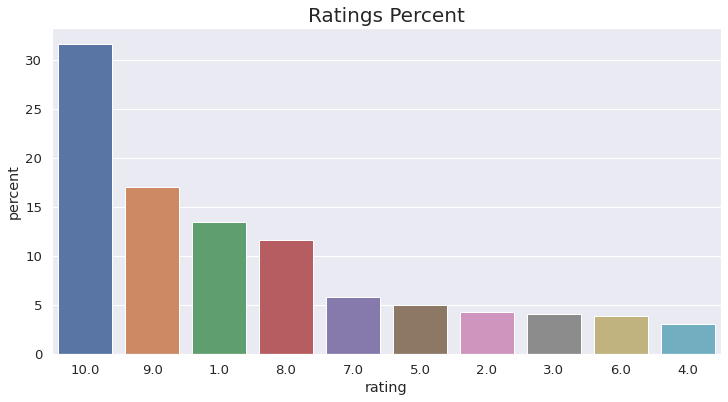

In [22]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

In [24]:
#lets check the number of drugs/condition
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
not listed / othe                             253
pain                                          219
birth control                                 181
high blood pressure                           146
acne                                          127
depression                                    115
rheumatoid arthritis                          107
diabetes, type 2                               97
allergic rhinitis                              95
insomnia                                       85
osteoarthritis                                 84
bipolar disorde                                82
anxiety                                        81
abnormal uterine bleeding                      77
endometriosis                                  64
3</span> users found this comment helpful.     62
psoriasis                                      61
migraine                                       60
adhd                                           58
4</span> users found this comment helpfu

In [25]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


In [26]:
#drop the nosie 
merged_data.drop(span_data.index, axis = 0, inplace=True)

In [27]:
#check the percentage of 'not listed / othe' conditions
not_listed = merged_data[merged_data['condition'] == 'not listed / othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/merged_data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))

Number of not_listed values :  592
Total percent of noisy data 0.2767751949582032 %  


In [28]:
# drop noisy data
merged_data.drop(not_listed.index)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,birth control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,opiate dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"breast cancer, prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
215059,140714,Escitalopram,anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
215060,130945,Levonorgestrel,birth control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
215061,47656,Tapentadol,pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


In [29]:
# check the null values
merged_data.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [30]:
# drop the null values NAN
merged_data.dropna(inplace=True, axis=0)

In [31]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [32]:
#apply review_to_words function on reviews
merged_data['review'] = merged_data['review'].apply(review_to_words)

In [33]:
#create sentiment feature from ratings
#if rating > 5 sentiment = 1 (positive)
#if rating < 5 sentiment = 0 (negative)
merged_data['sentiment'] = merged_data["rating"].apply(lambda x: 1 if x > 5 else 0)

In [34]:
display(merged_data.head(10))

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,left ventricular dysfunction,side effect take combin bystol mg fish oil,9.0,"May 20, 2012",27,1
1,95260,Guanfacine,adhd,son halfway fourth week intuniv becam concern ...,8.0,"April 27, 2010",192,1
2,92703,Lybrel,birth control,use take anoth oral contracept pill cycl happi...,5.0,"December 14, 2009",17,0
3,138000,Ortho Evra,birth control,first time use form birth control glad went pa...,8.0,"November 3, 2015",10,1
4,35696,Buprenorphine / naloxone,opiate dependence,suboxon complet turn life around feel healthie...,9.0,"November 27, 2016",37,1
5,155963,Cialis,benign prostatic hyperplasia,nd day mg start work rock hard erect howev exp...,2.0,"November 28, 2015",43,0
6,165907,Levonorgestrel,emergency contraception,pull cum bit took plan b hour later took pregn...,1.0,"March 7, 2017",5,0
7,102654,Aripiprazole,bipolar disorde,abilifi chang life hope zoloft clonidin first ...,10.0,"March 14, 2015",32,1
8,74811,Keppra,epilepsy,noth problem keppera constant shake arm leg pi...,1.0,"August 9, 2016",11,0
9,48928,Ethinyl estradiol / levonorgestrel,birth control,pill mani year doctor chang rx chateal effect ...,8.0,"December 8, 2016",1,1


In [35]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC


In [36]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(merged_data.review)
reviews_corpus.shape


(212698, 34709)

In [37]:
#dependent feature
sentiment = merged_data['sentiment']
sentiment.shape

(212698,)

In [38]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142507, 34709) (142507,)
Test data shape  (70191, 34709) (70191,)


In [39]:
from sklearn.ensemble import RandomForestClassifier
#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))
cr = classification_report(pred, Y_test)
print("\n\nClassification Report\n")
print(cr)

Accuracy: 0.8945733783533502
Confusion Matrix
[[13939   561]
 [ 6839 48852]]


Classification Report

              precision    recall  f1-score   support

           0       0.67      0.96      0.79     14500
           1       0.99      0.88      0.93     55691

    accuracy                           0.89     70191
   macro avg       0.83      0.92      0.86     70191
weighted avg       0.92      0.89      0.90     70191

